# LightGMB Iteration 3

- Using a smoothing window of 250
- Use same scaler as on training

In [1]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, log_loss

import warnings
warnings.filterwarnings('ignore')

/Users/harpalsahota/.local/share/virtualenvs/reducing_commercial_aviation_fatalities-bqjJ6FiO/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
dtypes = {"crew": "int8",
          "experiment": "category",
          "time": "float32",
          "seat": "int8",
          "eeg_fp1": "float32",
          "eeg_f7": "float32",
          "eeg_f8": "float32",
          "eeg_t4": "float32",
          "eeg_t6": "float32",
          "eeg_t5": "float32",
          "eeg_t3": "float32",
          "eeg_fp2": "float32",
          "eeg_o1": "float32",
          "eeg_p3": "float32",
          "eeg_pz": "float32",
          "eeg_f3": "float32",
          "eeg_fz": "float32",
          "eeg_f4": "float32",
          "eeg_c4": "float32",
          "eeg_p4": "float32",
          "eeg_poz": "float32",
          "eeg_c3": "float32",
          "eeg_cz": "float32",
          "eeg_o2": "float32",
          "ecg": "float32",
          "r": "float32",
          "gsr": "float32",
          "event": "category",
         }

In [3]:
train_df = pd.read_csv("./train.csv", dtype=dtypes, header=0)

In [4]:
test_df = pd.read_csv("./test.csv", dtype=dtypes, header=0)

In [5]:
train_df.head()

,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,...,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr,event
0,1,CA,0.011719,1,-5.28545,26.775801,-9.527310,-12.793200,16.717800,33.737499,...,37.368999,17.437599,19.201900,20.5968,-3.95115,14.507600,-4520.0,817.705994,388.829987,A
1,1,CA,0.015625,1,-2.42842,28.430901,-9.323510,-3.757230,15.969300,30.443600,...,31.170799,19.399700,19.689501,21.3547,1.33212,17.750200,-4520.0,817.705994,388.829987,A
2,1,CA,0.019531,1,10.67150,30.420200,15.350700,24.724001,16.143101,32.142799,...,-12.012600,19.396299,23.171700,22.4076,1.53786,22.247000,-4520.0,817.705994,388.829987,A
3,1,CA,0.023438,1,11.45250,25.609800,2.433080,12.412500,20.533300,31.494101,...,18.574100,23.156401,22.641199,19.3367,2.54492,18.998600,-4520.0,817.705994,388.829987,A
4,1,CA,0.027344,1,7.28321,25.942600,0.113564,5.748000,19.833599,28.753599,...,6.555440,22.754700,22.670300,20.2932,1.69962,22.812799,-4520.0,817.705994,388.829987,A


In [6]:
test_df.head()

,id,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,...,eeg_f4,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr
0,0,1,LOFT,0.000000,0,17.899500,6.127830,0.994807,-28.206200,-47.695499,...,-7.044480,-14.405100,-4.03384,-0.393799,31.83810,17.075600,-8.137350,-7323.120117,643.177002,594.778992
1,1,1,LOFT,0.000000,1,45.883202,94.749001,23.290800,1.392000,2.060940,...,19.887501,-215.179001,2.11832,7.340940,9.66785,1169.239990,-0.024414,-3335.080078,826.724976,136.235001
2,2,1,LOFT,0.003906,0,33.120098,28.356501,-7.239220,-7.690860,-25.833799,...,-7.642560,-10.363600,10.95050,6.513360,36.01860,24.356600,0.956158,-7323.120117,643.177002,594.778992
3,3,1,LOFT,0.003906,1,43.280102,95.887001,18.702299,-1.432890,-4.232600,...,13.826600,-214.223007,-4.91354,3.504520,3.87811,1159.400024,-0.047607,-3335.080078,826.724976,136.235001
4,4,1,LOFT,0.007812,0,7.929110,3.460380,-10.860800,-26.366699,-25.894699,...,2.045450,-20.788799,-3.61418,-7.539830,3.08397,13.647900,1.473720,-7323.120117,643.177002,594.778992


In [7]:
features_n = [
    "eeg_fp1",
    "eeg_f7",
    "eeg_f8",
    "eeg_t4",
    "eeg_t6",
    "eeg_t5",
    "eeg_t3",
    "eeg_fp2",
    "eeg_o1",
    "eeg_p3",
    "eeg_pz",
    "eeg_f3",
    "eeg_fz",
    "eeg_f4",
    "eeg_c4",
    "eeg_p4",
    "eeg_poz",
    "eeg_c3",
    "eeg_cz",
    "eeg_o2",
    "ecg",
    "r",
    "gsr"
]

In [8]:
train_df['pilot'] = 100 * train_df['seat'] + train_df['crew']

In [9]:
test_df['pilot'] = 100 * test_df['seat'] + test_df['crew']


In [10]:
print("Number of pilots : ", len(train_df['pilot'].unique()))


Number of pilots :  18


In [11]:
train_df.head()

,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,...,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr,event,pilot
0,1,CA,0.011719,1,-5.28545,26.775801,-9.527310,-12.793200,16.717800,33.737499,...,17.437599,19.201900,20.5968,-3.95115,14.507600,-4520.0,817.705994,388.829987,A,101
1,1,CA,0.015625,1,-2.42842,28.430901,-9.323510,-3.757230,15.969300,30.443600,...,19.399700,19.689501,21.3547,1.33212,17.750200,-4520.0,817.705994,388.829987,A,101
2,1,CA,0.019531,1,10.67150,30.420200,15.350700,24.724001,16.143101,32.142799,...,19.396299,23.171700,22.4076,1.53786,22.247000,-4520.0,817.705994,388.829987,A,101
3,1,CA,0.023438,1,11.45250,25.609800,2.433080,12.412500,20.533300,31.494101,...,23.156401,22.641199,19.3367,2.54492,18.998600,-4520.0,817.705994,388.829987,A,101
4,1,CA,0.027344,1,7.28321,25.942600,0.113564,5.748000,19.833599,28.753599,...,22.754700,22.670300,20.2932,1.69962,22.812799,-4520.0,817.705994,388.829987,A,101


### Smoothing Tests

In [13]:
test = train_df[train_df['pilot']==101]

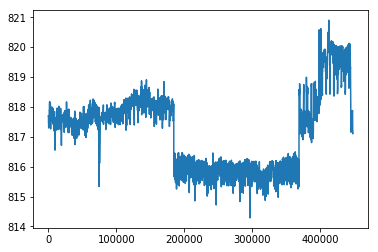

In [14]:
test['r'].plot.line()

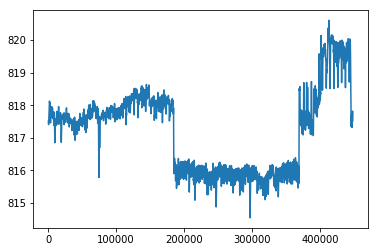

In [21]:
test['r'].rolling(250, center=False).mean().plot.line()

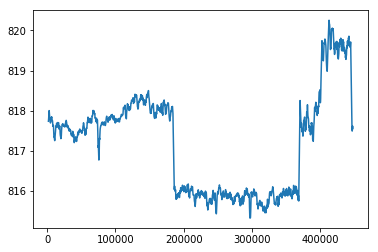

In [22]:
test['r'].rolling(1000, center=False).mean().plot.line()

## Apply normalisation and train

In [17]:
def smooth_data(df, features, window=500):
    pilots = df["pilot"].unique()
    for pilot in pilots:
        pilot_df = df[df['pilot']==pilot]
        ids = df[df["pilot"] == pilot].index
        for f in features:
            pilot_df[f] = pilot_df[f].rolling(window, center=True).mean()
        df.loc[ids] = pilot_df
    return df

In [18]:
def normalize_by_pilots(df):
    pilots = df["pilot"].unique()
    for pilot in pilots:
        ids = df[df["pilot"] == pilot].index
        scaler = MinMaxScaler()
        df.loc[ids, features_n] = scaler.fit_transform(df.loc[ids, features_n])
    return df, scaler

In [19]:
train_df = smooth_data(train_df, features_n, window=250)

In [20]:
train_df.head()

,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,...,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr,event,pilot
0,1,CA,0.011719,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,101
1,1,CA,0.015625,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,101
2,1,CA,0.019531,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,101
3,1,CA,0.023438,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,101
4,1,CA,0.027344,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,101


In [23]:
train_df.shape

(4867421, 29)

In [24]:
train_df = train_df.dropna(axis=0, how='any')

In [25]:
train_df.shape

(4862939, 29)

In [26]:
train_df, scaler = normalize_by_pilots(train_df)

In [39]:
test_df_filled = test_df.copy()
test_df_filled = smooth_data(test_df_filled, features_n, window=250)
test_df_filled = test_df_filled.fillna(test_df)

In [40]:
test_df_filled, _ = normalize_by_pilots(test_df_filled)

In [41]:
test_df_filled.shape

(17965143, 29)

In [43]:
test_df_filled.head()

,id,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,...,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr,pilot
0,0,1,LOFT,0.000000,0,0.369658,0.484190,0.438947,0.447300,0.351119,...,0.433164,0.430915,0.426885,0.644502,0.430344,0.578221,0.774650,0.735014,0.330705,1
1,1,1,LOFT,0.000000,1,0.505454,0.523291,0.501800,0.496178,0.494166,...,0.437551,0.495311,0.500456,0.496277,0.785273,0.429291,0.997608,0.612943,0.072307,101
2,2,1,LOFT,0.003906,0,0.379866,0.550726,0.428695,0.464329,0.364761,...,0.441260,0.447683,0.436704,0.658453,0.442851,0.594718,0.774650,0.735014,0.330705,1
3,3,1,LOFT,0.003906,1,0.504837,0.523565,0.500707,0.495504,0.492674,...,0.437770,0.493639,0.499533,0.494904,0.782990,0.429287,0.997608,0.612943,0.072307,101
4,4,1,LOFT,0.007812,0,0.362970,0.476206,0.424186,0.448827,0.364723,...,0.420375,0.431385,0.416727,0.548547,0.424456,0.595657,0.774650,0.735014,0.330705,1


In [42]:
train_df.head()

,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,...,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr,event,pilot
207,1,CA,0.500000,1,0.544055,0.532902,0.558017,0.567993,0.531126,0.556722,...,0.531898,0.524639,0.526501,0.518639,0.354986,0.357811,0.490320,0.321024,A,101
209,1,CA,0.503906,1,0.544233,0.533087,0.558267,0.568296,0.531378,0.556937,...,0.532088,0.524852,0.526682,0.518727,0.355129,0.357876,0.490048,0.320977,A,101
211,1,CA,0.507812,1,0.544350,0.533236,0.558471,0.568536,0.531588,0.557151,...,0.532250,0.525039,0.526831,0.518715,0.355249,0.357918,0.489786,0.320929,A,101
213,1,CA,0.511719,1,0.544407,0.533375,0.558571,0.568702,0.531794,0.557360,...,0.532405,0.525210,0.526992,0.518677,0.355341,0.357960,0.489515,0.320880,A,101
215,1,CA,0.515625,1,0.544447,0.533537,0.558743,0.568869,0.531976,0.557565,...,0.532530,0.525382,0.527152,0.518610,0.355439,0.358002,0.489243,0.320831,A,101


In [44]:
train_df, val_df = train_test_split(
    train_df,
    test_size=0.2,
    random_state=42,
    stratify=train_df['event']
)

In [45]:
print(f"Training on {train_df.shape[0]} samples.")

Training on 3890351 samples.


In [46]:
features = ["crew", "seat"] + features_n

In [47]:
def run_lgb(df_train, df_test):
    # Classes as integers
    dic = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
    try:
        df_train["event"] = df_train["event"].apply(lambda x: dic[x])
        df_test["event"] = df_test["event"].apply(lambda x: dic[x])
    except:
        pass

    params = {"objective" : "multiclass",
              "num_class": 4,
              "metric" : "multi_error",
              "num_leaves" : 30,
              "min_child_weight" : 50,
              "learning_rate" : 0.1,
              "bagging_fraction" : 0.7,
              "feature_fraction" : 0.7,
              "bagging_seed" : 420,
              "verbosity" : -1
             }

    lg_train = lgb.Dataset(df_train[features], label=list(df_train["event"]))
    lg_test = lgb.Dataset(df_test[features], label=list(df_test["event"]))
    model = lgb.train(
        params,
        lg_train,
        1000,
        valid_sets=[lg_test],
        early_stopping_rounds=50,
        verbose_eval=100
    )
    return model

In [48]:
model = run_lgb(train_df, val_df)

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's multi_error: 0.0706075
[200]	valid_0's multi_error: 0.0516714
[300]	valid_0's multi_error: 0.038085
[400]	valid_0's multi_error: 0.0291747
[500]	valid_0's multi_error: 0.0223137
[600]	valid_0's multi_error: 0.0173825
[700]	valid_0's multi_error: 0.0135597
[800]	valid_0's multi_error: 0.010687
[900]	valid_0's multi_error: 0.00843523
[1000]	valid_0's multi_error: 0.00680247
Did not meet early stopping. Best iteration is:
[1000]	valid_0's multi_error: 0.00680247


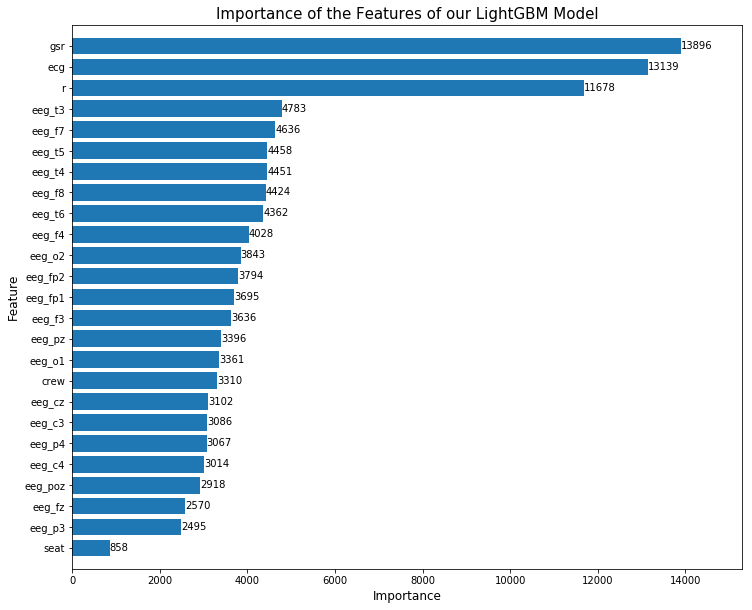

In [49]:
fig, ax = plt.subplots(figsize=(12,10))
lgb.plot_importance(model, height=0.8, ax=ax)
ax.grid(False)
plt.ylabel('Feature', size=12)
plt.xlabel('Importance', size=12)
plt.title("Importance of the Features of our LightGBM Model", fontsize=15)
plt.show()

In [50]:
pred_val = model.predict(val_df[features], num_iteration=model.best_iteration)


In [51]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', normalize=False, cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fmt = '.2f' if normalize else 'd'

    fig, ax = plt.subplots(figsize=(15, 10))
    ax.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size=15)
    plt.colorbar()
    plt.grid(False)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = (cm.max()+cm.min()) / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', size=12)
    plt.xlabel('Predicted label', size=12)

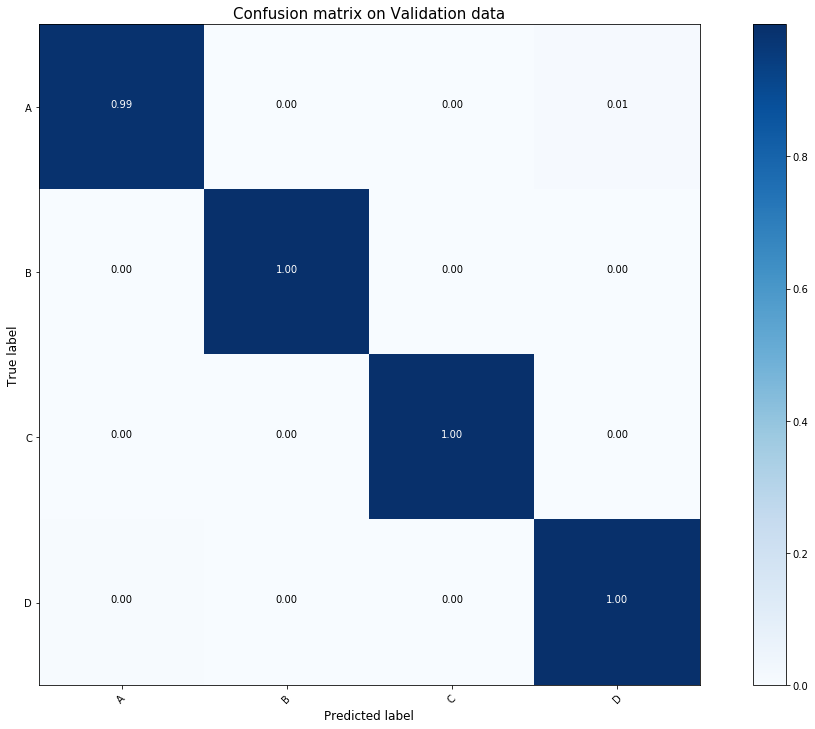

In [52]:
import itertools
conf_mat_val = confusion_matrix(np.argmax(pred_val, axis=1), val_df["event"].values)
plot_confusion_matrix(conf_mat_val, ["A", "B", "C", "D"], title='Confusion matrix on Validation data', normalize=True)

In [53]:
pred_test = model.predict(test_df_filled[features], num_iteration=model.best_iteration)

In [54]:
submission = pd.DataFrame(
    np.concatenate((np.arange(len(test_df))[:, np.newaxis], pred_test), axis=1), 
    columns=['id', 'A', 'B', 'C', 'D']
)

In [55]:
submission['id'] = submission['id'].astype(int)

In [56]:
submission.head()

,id,A,B,C,D
0,0,0.950343,0.010664,0.009370,0.029623
1,1,0.680725,0.000027,0.260476,0.058772
2,2,0.947878,0.013774,0.010799,0.027549
3,3,0.684496,0.000028,0.256248,0.059228
4,4,0.929996,0.003871,0.037640,0.028493


In [57]:
submission.to_csv("lgbm_iter_3.csv", index=False, header=True)